# Grapevine Disease Classification(CNN)

<img src='https://organigiz.org/wp-content/uploads/2018/04/karaot-4.jpg' >

<a href=https://www.kaggle.com/datasets/pushpalama/grape-disease>Grapevine Disease Dataset</a>

Each class has 1344 augmented images and 1656 images from the original dataset, for a total of 3000 images per class. The four classes are Black Rot, ESCA, Leaf Blight, and Healthy.

Bu projede amacımız sınıflandırma(classification) ile üzüm yaprağının hasta olup olmadığını tahmin eden bir model oluşturacağım.

İlk başta model olarak derin öğrenmeyi(deep learning) kullanacağım.Daha sonrasındaysa Transer Learning ile oluşturacağım.(Daha önceden eğitilmiş modelleri kendi veri setimle birleştirerrek o medoli kullanacğım.)

##  Kütüphaneler - Libraries 

Gerekli olan paketleri yüklüyorum.

In [2]:
import cv2 # Resimleri okur.Ve işlem yapmamızı kolaylaştırıır.+
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Veriyi ikiye ayırıyor

from keras.models import Sequential # Keras Kütüphanesi deep learning yapmamızı sağlıyor.
from keras.layers import Conv2D,Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.callbacks import EarlyStopping
import os 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') # Uyarıları engelliyor.

In [3]:
# Veri setini okuyoruz

In [4]:
labels=['Leaf Blight', 'Healthy', 'Black Rot', 'ESCA']
img_path='Final Training Data/'

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df=pd.DataFrame({'img':img_list, 'label':label_list})

In [7]:
d=({'Leaf Blight':0, 'Healthy':1,'Black Rot':2 ,'ESCA':3})
df['label_encoded']=df['label'].map(d)

## Modelling - Modeli Oluşturma

In [8]:
x=[] # bos liste
for img in df['img']:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(64,64))
    img=img/255.0 # normalize et
    x.append(img)

In [9]:
x=np.array(x)

In [10]:
x.shape

(12000, 64, 64, 3)

In [11]:
y=df['label_encoded']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20) 

In [13]:
# Model oluşturmak için veri setinii eğitim ve test verisi olark ikiye ayırıyorum.Rastgele şekilde

In [14]:
y_train=np.array(y_train, dtype=np.int32)
y_test=np.array(y_test, dtype=np.int32)

In [15]:
# Aşağıda bir sinir ağı oluşturuyorum.

In [16]:
model=Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(170, activation='relu')) 
model.add(Dense(130, activation='relu'))
model.add(Dropout(0.5))
# Added activation function
model.add(Dense(5, activation='softmax'))  # Ensure 5 classes for softmax

# Compile the model
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
# aşırı Öğrenmeyi engeller ve en yüksek başarı değerinde modeli durdurur

In [18]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20, verbose=1, callbacks=[early])

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6480 - loss: 0.7982 - val_accuracy: 0.7950 - val_loss: 0.4169
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8442 - loss: 0.4106 - val_accuracy: 0.8988 - val_loss: 0.2581
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8901 - loss: 0.3090 - val_accuracy: 0.9204 - val_loss: 0.2435
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9119 - loss: 0.2481 - val_accuracy: 0.9287 - val_loss: 0.1970
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9369 - loss: 0.1793 - val_accuracy: 0.9550 - val_loss: 0.1391
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9546 - loss: 0.1386 - val_accuracy: 0.9696 - val_loss: 0.0954
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9639 - loss: 0.1041 - val_accuracy: 0.9696 - val_loss: 0.1065
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9710 - loss: 0.0973 - val_acc

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 170)                 │          21,930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 130)                 │          22,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 130)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009,903 (19.11 MB)

 Trainable params: 1,669,967 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,339,936 (12.74 MB)

In [20]:
## Confusion Matrix

In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step 


In [23]:
cm = confusion_matrix(y_test, y_pred_classes)

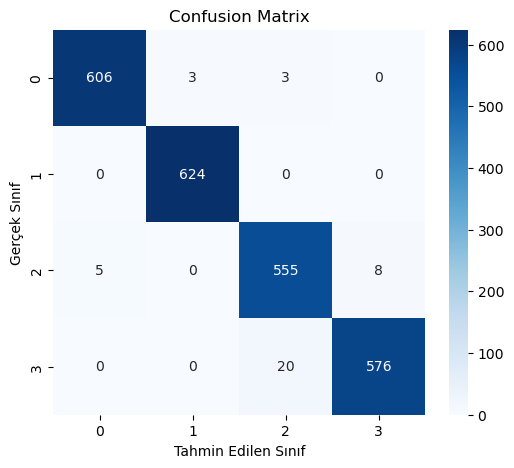

In [24]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')    
plt.ylabel('Gerçek Sınıf') 
plt.title('Confusion Matrix')
plt.show()

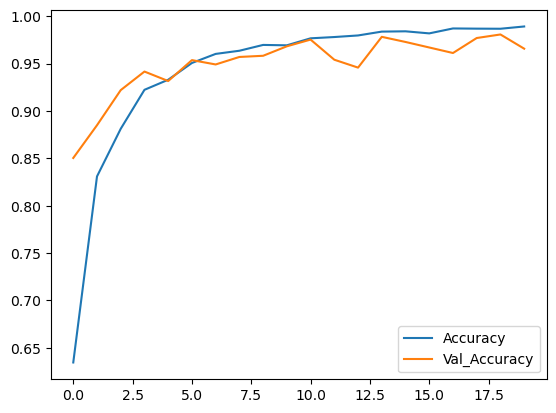

In [52]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [36]:
# Modeli kaydediyoruz.

In [34]:
model.save('grapevine_disease_cnn.h5')

## Sonuç - Conclusion

Modelimin başarı oranı  %98 civarında çıktı. Bu sonuç, modelin verileri doğru sınıflandırma konusunda yüksek bir performansa sahip olduğunu göstermektedir.

Ayrıca en çok hatayı Black rot sınıfında yapmış oluğunu gördüm.

# Grapevine Disease Classification(Transfer learning)

In [49]:
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
data_dir='Final Training Data'
img_width,img_heigth=224,224
train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='training')
test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='validation')

base_model=Xception(weights='imagenet', input_shape=(img_width,img_heigth,3), include_top=False)

model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=3,validation_data=test_datagenerator)

Found 9600 images belonging to 4 classes.
Found 2400 images belonging to 4 classes.
Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - accuracy: 0.9190 - loss: 1.4171 - val_accuracy: 0.9592 - val_loss: 0.2178
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 631s 2s/step - accuracy: 0.9683 - loss: 0.1729 - val_accuracy: 0.9621 - val_loss: 0.2341
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.9798 - loss: 0.1013 - val_accuracy: 0.9717 - val_loss: 0.1710


In [51]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,158,198 (1.23 GB)

 Trainable params: 102,765,572 (392.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 205,531,146 (784.04 MB)

In [53]:
model.save('grapevine_disease-TL-C.h5')

## Sonuç - Conclusion